# **Rocket League Championship Series Data Analysis - CS105 Final Project Report**
David Ryan, Kendrew Christanto, Jonathan Thai, and Nicholas Chang

## **Project Description**

### What is *Rocket League*?
*Rocket League* a vehicular soccer video game developed by Psyonix. The way you play the game is that its soccer, but with rocket-powered cars. *Rocket League* has up to **8 players** assigned to each of the **2 teams**, using rocket-powered vehicles to hit a ball into their opponent's goal and score points over the course of a match.

### What is the *Rocket League Championship Series*?
*Rocket League Championship Series* is an annual Esports tournament series for *Rocket League*. It consists of qualification splits in North America, South America, Europe, Oceania, Middle East/North Africa, Asia, and Sub-Saharan Africa, and culminates in a playoff bracket with teams from those regions.

### The Data
The dataset we have is a *Rocket League Championship Series* dataset that includes game data for 34,000 teams and 101,000 players. The team dataset includes a team's number of goals, assists, saves, and assists, along with a team's boost amount collected, total distance of movement, amount of time spent on offensive and defensive positioning, and the number of cars demolished.

The player dataset contains the same features as the team dataset, with differences only in the amount of goal participation and whether the winning player is an mvp or not.

**Our Dataset:** https://www.kaggle.com/datasets/dylanmonfret/rlcs-202122

Because there's so much data, we'll look into specifically `games_by_players.csv` and `games_by_teams.csv`. The data will be cleaned to only include relevant data points of interest

### Our Goal for this Project *(Haha! Get it? Goals?!?!)*
The goal of our project is to draw correlations between winning matches
alongside various game statistics of players that perform in the Rocket
League Championship Series 2021-2022.

We hope to accomplish by relating winning matches to data points such as
number of goals scored, car boost amount, movement, positioning, and game
controls with respect to wins.

## **Data Preparation**
The code under `!` is just Linux commands. We decided to upload the dataset through Linux because Google Colab delete the dataset each time we start a new runtime.

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download dylanmonfret/rlcs-202122
! unzip rlcs-202122.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 94% 42.0M/44.5M [00:00<00:00, 95.8MB/s]
100% 44.5M/44.5M [00:00<00:00, 75.2MB/s]
Archive:  rlcs-202122.zip
  inflating: games_by_players.csv    
  inflating: games_by_teams.csv      
  inflating: main.csv                
  inflating: matches_by_players.csv  
  inflating: matches_by_teams.csv    
  inflating: players_db.csv          


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
games_by_teams = pd.read_csv('./games_by_teams.csv')
games_by_players = pd.read_csv('./games_by_players.csv')

**Original Dataset (Before Cleaning)**

In [4]:
games_by_teams

,game_id,color,team_id,team_slug,team_name,team_region,ball_possession_time,ball_time_in_side,core_shots,core_goals,...,positioning_time_defensive_third,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,winner
0,616004f3143c37878b238690,blue,6020bc8ef1e4807cc700391a,https://octane.gg/teams/391a-ground-zero-gaming,GROUND ZERO GAMING,Oceania,136.54,170.84,13,2,...,513.73,291.06,189.48,660.06,334.20,727.07,267.20,1.0,3.0,True
1,616004f3143c37878b238690,orange,614c8930f8090ec745286474,https://octane.gg/teams/6474-ranga-roundup,RANGA ROUNDUP,Oceania,153.60,148.51,4,1,...,457.04,329.25,214.03,633.39,366.93,740.69,259.64,3.0,1.0,False
2,616004f7143c37878b238697,blue,6020bc8ef1e4807cc700391a,https://octane.gg/teams/391a-ground-zero-gaming,GROUND ZERO GAMING,Oceania,155.79,145.60,10,4,...,507.95,308.51,264.92,659.74,421.65,780.01,301.38,5.0,1.0,True
3,616004f7143c37878b238697,orange,614c8930f8090ec745286474,https://octane.gg/teams/6474-ranga-roundup,RANGA ROUNDUP,Oceania,126.81,185.78,6,2,...,561.51,360.96,147.48,762.21,307.73,782.32,287.61,1.0,5.0,False
4,616004fc143c37878b23869e,blue,6020bc8ef1e4807cc700391a,https://octane.gg/teams/391a-ground-zero-gaming,GROUND ZERO GAMING,Oceania,165.76,136.11,11,3,...,476.66,373.66,279.05,648.19,481.20,832.70,296.69,0.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34703,62a39926da9d7ca1c7bb22d7,orange,60b63cfdfec4a0857e7ba00c,https://octane.gg/teams/a00c-detonator,DETONATOR,Asia-Pacific North,147.18,144.93,9,3,...,506.96,349.96,200.79,685.85,371.86,839.75,217.98,6.0,5.0,True
34704,62a3992ada9d7ca1c7bb22de,blue,621cd6a8c437fde7e02d129b,https://octane.gg/teams/129b-gaimin-gladiators,GAIMIN GLADIATORS,Asia-Pacific North,115.54,186.99,11,6,...,590.17,332.65,225.62,761.98,386.47,821.79,326.65,3.0,3.0,True
34705,62a3992ada9d7ca1c7bb22de,orange,60b63cfdfec4a0857e7ba00c,https://octane.gg/teams/a00c-detonator,DETONATOR,Asia-Pacific North,157.68,158.29,11,2,...,502.12,364.31,282.90,700.69,448.64,819.04,330.29,3.0,3.0,False
34706,62a39930da9d7ca1c7bb22e5,blue,621cd6a8c437fde7e02d129b,https://octane.gg/teams/129b-gaimin-gladiators,GAIMIN GLADIATORS,Asia-Pacific North,156.41,124.04,11,2,...,341.60,344.28,305.73,507.63,483.98,698.49,293.12,1.0,3.0,True


In [5]:
games_by_players

,game_id,color,team_id,team_region,player_id,player_tag,core_shots,core_goals,core_saves,core_assists,...,car_id,car_name,steering_sensitivity,camera_fov,camera_height,camera_pitch,camera_distance,camera_stiffness,camera_swivel_speed,camera_transition_speed
0,616004f3143c37878b238690,blue,6020bc8ef1e4807cc700391a,Oceania,5f3d8fdd95f40596eae2412e,Amphis,4,1,1,0,...,4284.0,Fennec,3.05,110.0,100.0,-3.0,260.0,0.40,2.4,1.2
1,616004f3143c37878b238690,blue,6020bc8ef1e4807cc700391a,Oceania,5f3d8fdd95f40596eae23e01,Torsos,5,0,2,1,...,403.0,Dominus,1.00,110.0,100.0,-2.0,250.0,0.55,10.0,1.4
2,616004f3143c37878b238690,blue,6020bc8ef1e4807cc700391a,Oceania,5f3d8fdd95f40596eae23e53,Express,4,1,0,0,...,4284.0,Fennec,1.30,110.0,100.0,-3.0,260.0,0.50,2.5,1.2
3,616004f3143c37878b238690,orange,614c8930f8090ec745286474,Oceania,604e562901d675f81a96b270,mel kin,2,0,6,0,...,403.0,Dominus,1.51,110.0,90.0,-4.0,280.0,0.30,6.0,1.0
4,616004f3143c37878b238690,orange,614c8930f8090ec745286474,Oceania,5f7ca648ea8a0f0714fb9a20,Laxin,1,0,3,0,...,23.0,Octane,1.75,110.0,90.0,-5.0,270.0,0.25,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104132,62a39930da9d7ca1c7bb22e5,blue,621cd6a8c437fde7e02d129b,Asia-Pacific North,5f3d8fdd95f40596eae23f3f,Abscrazy,5,1,0,1,...,23.0,Octane,1.05,110.0,100.0,-5.0,270.0,0.45,10.0,1.2
104133,62a39930da9d7ca1c7bb22e5,blue,621cd6a8c437fde7e02d129b,Asia-Pacific North,5f3d8fdd95f40596eae24148,LCT,4,0,0,1,...,403.0,Dominus,1.00,110.0,100.0,-3.0,270.0,0.50,6.6,1.2
104134,62a39930da9d7ca1c7bb22e5,orange,60b63cfdfec4a0857e7ba00c,Asia-Pacific North,616da861143c37878b239d65,Lunatic,0,0,5,0,...,4284.0,Fennec,1.80,110.0,100.0,-4.0,270.0,0.50,5.2,1.5
104135,62a39930da9d7ca1c7bb22e5,orange,60b63cfdfec4a0857e7ba00c,Asia-Pacific North,5f3d8fdd95f40596eae2414a,Burn,3,1,2,0,...,23.0,Octane,1.37,109.0,100.0,-4.0,270.0,0.40,7.0,1.2


## **Teams Dataset**
### **Data Cleaning for Teams Dataset**
David and Jonathan removed unnecessary all necessary features from the dataset, because we are aiming to look into more important features like core goals and assists, big and small boost amount, total distance, positioning time, and number of demolished vehicles.

For example, rather than sticking with overall boost amount collected, we wanted to look into boost count small and boost collected big. Since boost pads can randomly contain big or small speed boosts, so its good to separate.

In [6]:
col_interest = ['ball_possession_time', 'core_shots', 'core_goals', 'core_saves', 'core_assists', 'core_score', 'boost_count_collected_big', 'boost_count_collected_small', 'movement_total_distance',
                'positioning_time_defensive_third', 'positioning_time_offensive_third', 'positioning_time_defensive_half', 'positioning_time_offensive_half', 'demo_inflicted', 'winner']
clean_gbt = games_by_teams[col_interest]
list(clean_gbt)
win_df = clean_gbt.loc[clean_gbt['winner'] == True]
lose_df = clean_gbt.loc[clean_gbt['winner'] == False]


**EDA for Teams Dataset**

Johnathan decided to split winning teams and losing teams into different Dataframes, in case we want to analyze specifally winning teams or losing teams.

In [7]:
win_df.head()

,ball_possession_time,core_shots,core_goals,core_saves,core_assists,core_score,boost_count_collected_big,boost_count_collected_small,movement_total_distance,positioning_time_defensive_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,demo_inflicted,winner
0,136.54,13,2,3,1,921,48.0,208.0,1433406.0,513.73,189.48,660.06,334.20,1.0,True
2,155.79,10,4,3,3,1283,60.0,202.0,1581436.0,507.95,264.92,659.74,421.65,5.0,True
4,165.76,11,3,2,3,1201,71.0,219.0,1679856.0,476.66,279.05,648.19,481.20,0.0,True
6,140.93,14,8,2,8,1938,78.0,203.0,1686848.0,395.84,330.77,600.69,532.35,3.0,True
8,142.42,14,6,2,6,1567,71.0,243.0,1742004.0,405.76,326.10,627.00,560.28,5.0,True


In [8]:
lose_df.head()

,ball_possession_time,core_shots,core_goals,core_saves,core_assists,core_score,boost_count_collected_big,boost_count_collected_small,movement_total_distance,positioning_time_defensive_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,demo_inflicted,winner
1,153.60,4,1,10,0,1068,67.0,182.0,1539398.0,457.04,214.03,633.39,366.93,3.0,False
3,126.81,6,2,5,1,1023,67.0,186.0,1561261.0,561.51,147.48,762.21,307.73,1.0,False
5,141.17,5,2,6,2,1048,69.0,214.0,1674109.0,602.53,165.27,813.96,324.33,3.0,False
7,126.65,3,0,5,0,630,60.0,198.0,1567035.0,745.55,98.08,916.82,213.00,2.0,False
9,151.10,5,2,6,1,1038,65.0,175.0,1679917.0,691.43,140.91,883.18,295.33,3.0,False


David and Jonathan made a histogram showing the count for shots toward the goal, with hue based on winning and losing teams. We can tell that winning teams tend to shoot towards the goal more often than losing teams.

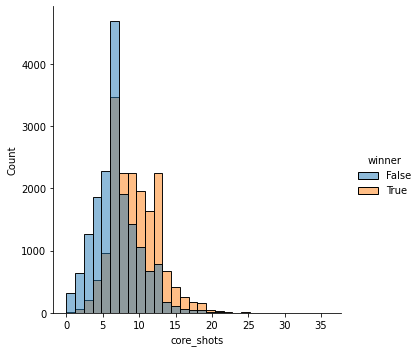

In [9]:
sns.displot(data=clean_gbt, x='core_shots',hue='winner', bins=30)

For some relationships between data points, such as the time a player spends on offense and the amount of shots they are able to take, our EDA proved to give answers that were to be expected.

For example, David and Jonathans linear regression plot showed that theres a strong relationship between ball possession time and total distance traveled on the field. Because this is the case for both winning and losing teams, this is to be expected.

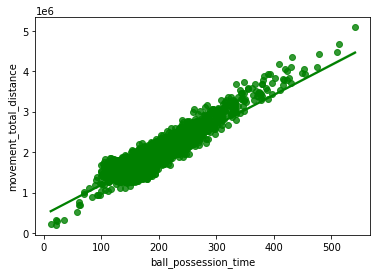

In [10]:
sns.regplot(data=win_df, x='ball_possession_time', y='movement_total_distance',color='green')

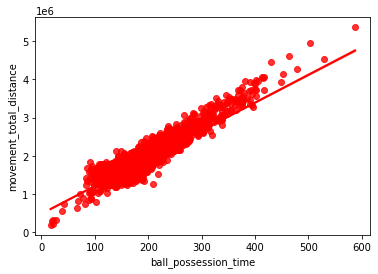

In [11]:
sns.regplot(data=lose_df, x='ball_possession_time', y='movement_total_distance',color='red')

Another example is that David and Jonathan discovered that offensive positioning leads to more shots being taken for both winning and losing teams. Defensive positioning is much more variable, sometimes even with a higher amount of time spent in defense both losing and winning teams are able to have a high number of shots taken. 

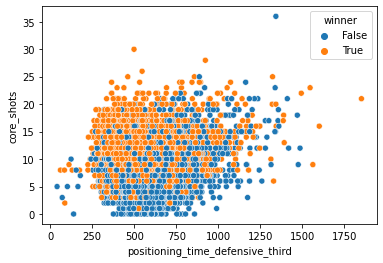

In [12]:
sns.scatterplot(data=clean_gbt, x='positioning_time_defensive_third', y='core_shots', hue='winner')

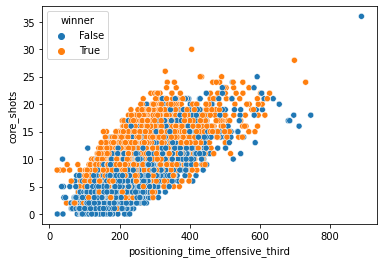

In [13]:
sns.scatterplot(data=clean_gbt, x='positioning_time_offensive_third', y='core_shots', hue='winner')

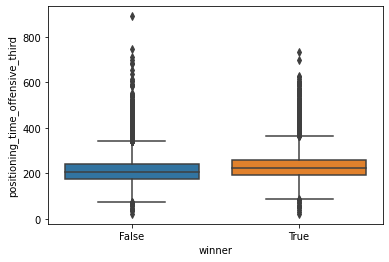

In [14]:
sns.boxplot(data=clean_gbt, x='winner', y='positioning_time_offensive_third')

David and Jonathan created two scatterplots for looking into whether  destroying opposing cars lead to more opportunities for offensive play and defensive positioning.

The reason for looking into this is that teams destroy their opponents in order to get the ball back and potentially score a goal. We wanted to look into the 3rd quarter of the game, since that period in the game is more tense.

When computing the two scatterplot, we found that the offensive positing in 3rd quarter vs. demolitioned inflicted and defensive positing in 3rd quarter vs. demolitioned inflicted are both very variable.

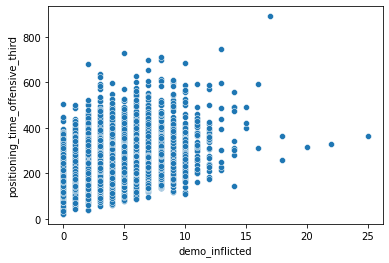

In [15]:
sns.scatterplot(data=clean_gbt, x='demo_inflicted', y='positioning_time_offensive_third')
##Does destroying opposing cars lead to more opportunities for offensive play? 

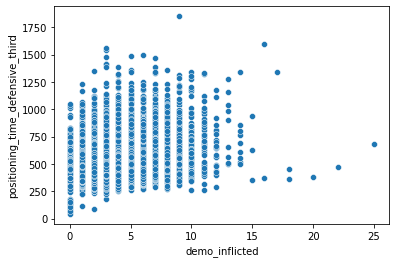

In [16]:
sns.scatterplot(data=clean_gbt, x='demo_inflicted', y='positioning_time_defensive_third')
##Does destroying opposing cars lead to more opportunities for offensive play by reducing time spent on defensive positioning? 

David and Jonathan made a Linear Regression model for predicting possession time based on how often destructions are inflicted (Does destroying opposing cars lead to more ball posession?)

We discovered that destruction infliction also did not work very well to predict possession time, despite the fact that destroying an enemy’s car in thought does mean a greater chance for your team to be in control of the ball.


<function matplotlib.pyplot.show>

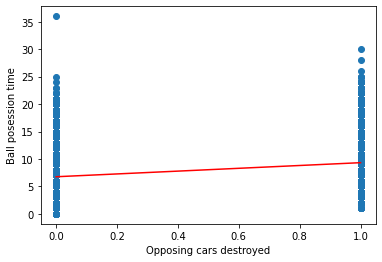

In [17]:
independent_x = clean_gbt.iloc[:, 14].values.reshape(-1, 1)
dependent_y = clean_gbt.iloc[:, 1].values.reshape(-1, 1)
independent_x = np.nan_to_num(independent_x)
dependent_y = np.nan_to_num(dependent_y)
linear_regressor = LinearRegression()
linear_regressor.fit(independent_x, dependent_y)
dependent_pred = linear_regressor.predict(independent_x)

plt.scatter(independent_x, dependent_y)
plt.plot(independent_x, dependent_pred, color = 'red')
plt.xlabel('Opposing cars destroyed')
plt.ylabel('Ball posession time')
plt.show

## **Players Dataset**

### **Data Cleaning for Teams Dataset**
Kendrew and Nicholas kept the same necessary features that are from the Team Dataset, but added more features such as core shooting percentage, advanced goal participation, advanced mvp, and steering sensitivity. We wanted those features specifically since we thought they could be important correlations to winning games

For example, we wanted to looking into advanced mvp because mvp players tend to perform better than regular players on winning teams.

In [18]:
col_interest = ['core_shots', 'core_shooting_percentage', 'core_goals', 'core_saves', 'core_assists', 'core_score', 'boost_bpm', 'boost_bcpm', 'boost_amount_collected',
                'boost_amount_collected_big', 'boost_amount_collected_small','boost_count_collected_big', 'boost_count_collected_small',
                'movement_avg_speed', 'movement_total_distance', 'movement_time_ground', 'movement_time_low_air', 'movement_time_high_air', 'movement_time_powerslide',
                'positioning_time_defensive_third', 'positioning_time_offensive_third', 'positioning_time_defensive_half', 'positioning_time_offensive_half', 'demo_inflicted',
                'advanced_goal_participation', 'advanced_rating', 'advanced_mvp', 'winner', 'steering_sensitivity']
clean_players = games_by_players[col_interest]
player_win_df = clean_players.loc[clean_players['winner'] == True]
player_lose_df = clean_players.loc[clean_players['winner'] == False]

Kendrew and Nicholas made a barplot showing that winning MVP players tend to score and assist goals more than regular players.

They both also made a pointplot comparing MVP players and regular players, and seeing the relationship between movement time spent on the ground and number of goals. Those who are winning players, regardless of MVP status tend to stay on the ground less when scoring early goals. MVP players, in fact, score early goals on the ground much less that regular winning players, meaning they score more often in the air, early in the game.

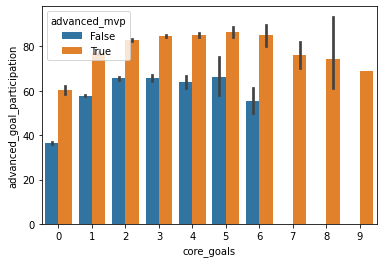

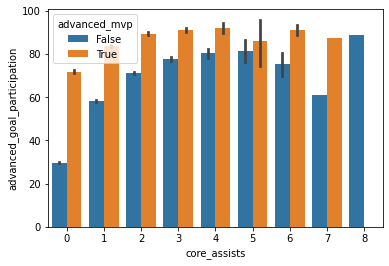

In [19]:
sns.barplot(data=player_win_df, x="core_goals", y="advanced_goal_participation", hue="advanced_mvp")
plt.show()
sns.barplot(data=player_win_df, x="core_assists", y="advanced_goal_participation", hue="advanced_mvp")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


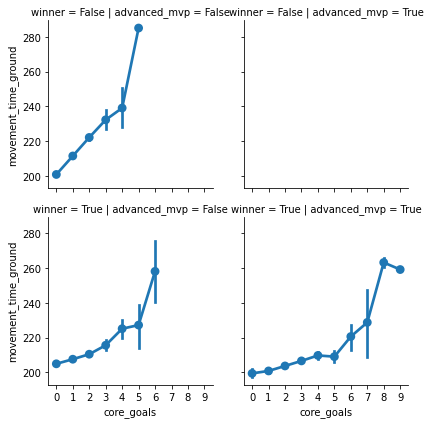

In [20]:
g = sns.FacetGrid(clean_players, col="advanced_mvp",  row="winner")
g.map(sns.pointplot, "core_goals", "movement_time_ground")

Kendrew and Nicholas made 2 scatterplots comparing the relationship between boost collected per minute and demolition of cars inflicted.

What they found was that regardless of losing, winning, or gaining mvp status, the relationship between boost collected and demolition inflicted is the same.

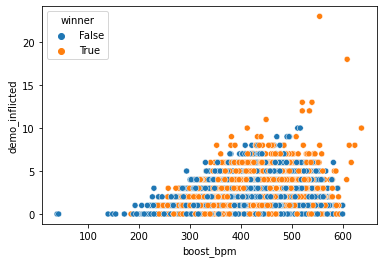

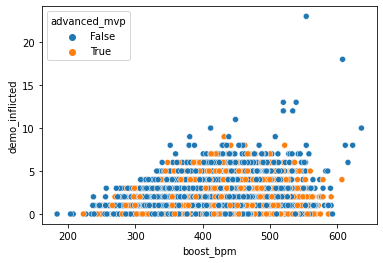

In [21]:
sns.scatterplot(x='boost_bpm', y='demo_inflicted', data=clean_players, hue='winner')
plt.show()
sns.scatterplot(x='boost_bpm', y='demo_inflicted', data=player_win_df, hue='advanced_mvp')
plt.show()

Kendrew and Nicholas also looked into counts for core saves, with the hue based on advanced mvp. The first two bars are not important since they represent zero. But what we learned was that mvp players tend to perform saves more often than regular players.

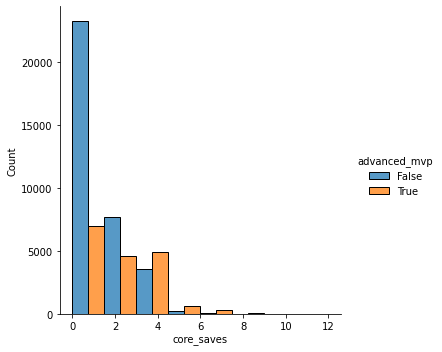

In [22]:
sns.displot(x='core_saves', data=player_win_df, hue='advanced_mvp', bins=8, multiple="dodge")
# First two bars are players with zero saves

Kendrew and Nicholas made 3 scatterplots showcasing relationships between movement time spent on ground vs. core shooting percentage, movement time spent on low air vs. core shooting percentage, and movement time spent on high air vs. core shooting percentage. 

What they found is that MVPs with a greater shooting percentage tend to spend more time high in the air, which is most likely where they take their shots from.  

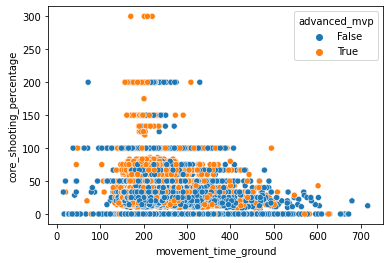

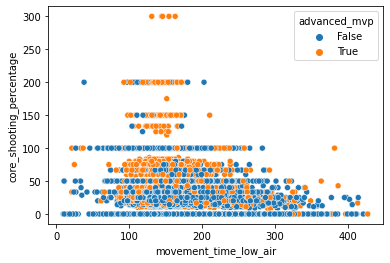

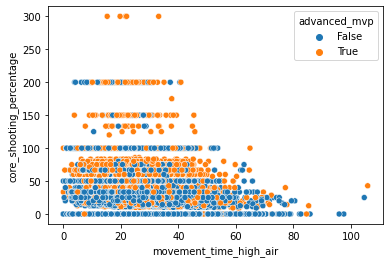

In [23]:
sns.scatterplot(data=clean_players, x="movement_time_ground", y="core_shooting_percentage", hue="advanced_mvp")
plt.show()
sns.scatterplot(data=clean_players, x="movement_time_low_air", y="core_shooting_percentage", hue="advanced_mvp")
plt.show()
sns.scatterplot(data=clean_players, x="movement_time_high_air", y="core_shooting_percentage", hue="advanced_mvp")
plt.show()

David and Jonathan made a Linear regression for predicting goals scored based on boost pickups per minute(Does picking up more boosts result in more goals being scored?)

What David and Jonathan discovered that boost pickups per minute were not a good predictor of goals, despite the fact that boosts are very important in the game as they allow quicker movement which is harder to defend against.

<function matplotlib.pyplot.show>

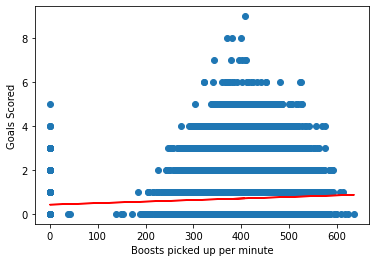

In [24]:
independent_x = clean_players.iloc[:, 6].values.reshape(-1, 1)
dependent_y = clean_players.iloc[:, 2].values.reshape(-1, 1)
independent_x = np.nan_to_num(independent_x)
dependent_y = np.nan_to_num(dependent_y)
linear_regressor = LinearRegression()
linear_regressor.fit(independent_x, dependent_y)
dependent_pred = linear_regressor.predict(independent_x)

plt.scatter(independent_x, dependent_y)
plt.plot(independent_x, dependent_pred, color = 'red')
plt.xlabel('Boosts picked up per minute')
plt.ylabel('Goals Scored')
plt.show

**K-Means Clustering for teams (ball possession time x core score)**
Nicholas made a K-Means Clustering model for the team's dataset, with a focus on ball possession time and core score.

In [25]:
import statsmodels.api as sm
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

df_temp = clean_gbt.truncate(before = 0, after = 300)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


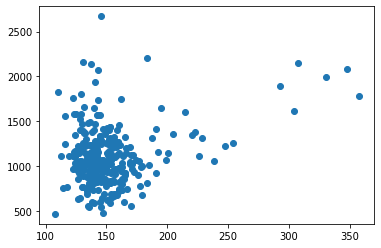

In [26]:
plt.scatter(df_temp['ball_possession_time'], df_temp['core_score'])

First K-Means used to find clustering for ball possession time and the core score.
Then we find the optimal number of clusters using the elbow method
We picked the number at the elbow which is 4 in this case.


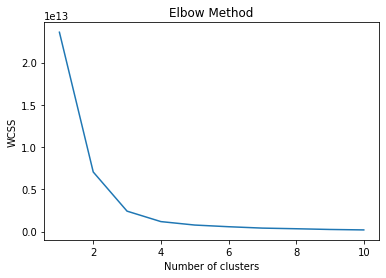

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(df_temp)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using the optimal number of clusters we found we plug them 
The points put into the graph which are called centroids
We calculate the distance of each point to the centroid and find the average
Those steps are repeated until clusters are found.

The groups are formed where the clusters are. 
This means that there are clusters of data when  looking at a ball possession time and core score graph.


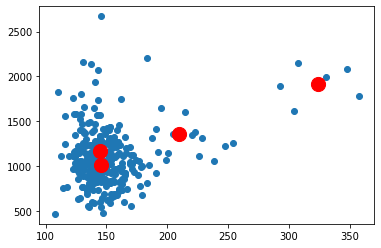

In [28]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_temp)
plt.scatter(df_temp['ball_possession_time'], df_temp['core_score'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 5], s=200, c='red')
plt.show()

**K-Means Clustering for teams (movement average speed x core score)**
The same is done for the other one for average movement speed and core score.

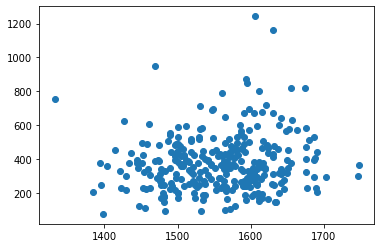

In [29]:
import statsmodels.api as sm
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

df_temp2 = clean_players.truncate(before = 0, after = 300)

plt.scatter(df_temp2['movement_avg_speed'], df_temp2['core_score'])

We find the optimal number of clusters using the elbow method which is 4.




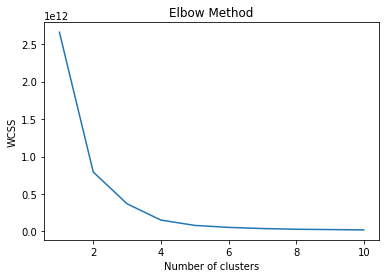

In [30]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(df_temp2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

And we find the groups using the clusters.

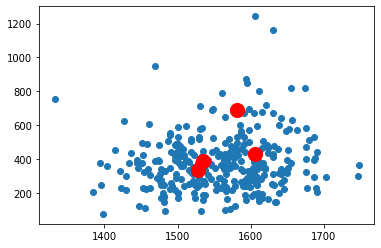

In [31]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_temp2)
plt.scatter(df_temp2['movement_avg_speed'], df_temp2['core_score'])
plt.scatter(kmeans.cluster_centers_[:, 13], kmeans.cluster_centers_[:, 5], s=200, c='red')
plt.show()

**Chi Squared Test [Correlation Testing]**

Kendrew produced a contingency table and ran a Chi-squared test for movement time_ground, advanced mvp, core_shooting_percentage, core_goals, steering_sensitivity.

movement_time_ground,"(14.589, 85.36]","(85.36, 155.43]","(155.43, 225.5]","(225.5, 295.57]","(295.57, 365.64]","(365.64, 435.71]","(435.71, 505.78]","(505.78, 575.85]","(575.85, 645.92]","(645.92, 715.99]"
advanced_mvp,,,,,,,,,,
False,37,777,71245,11030,2039,514,175,43,13,7
True,8,223,14477,1949,380,95,35,7,3,0


P-Value:  1.1322528521657752e-08


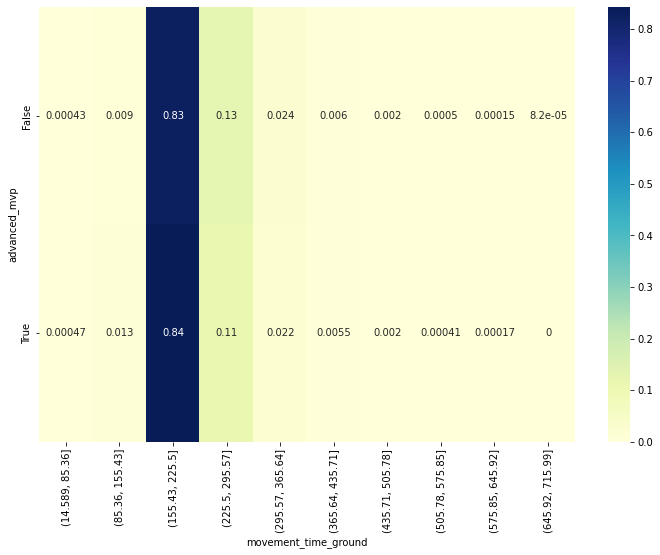

In [32]:
from scipy.stats import chi2_contingency

mvpAnalysis = clean_players[['advanced_mvp', 'movement_time_ground']].copy()
mvpAnalysis['movement_time_ground'] = pd.cut(mvpAnalysis['movement_time_ground'], 10)

contigency = pd.crosstab(mvpAnalysis['advanced_mvp'], mvpAnalysis['movement_time_ground'])
contigency

display(contigency)

contigency_pct = pd.crosstab(mvpAnalysis['advanced_mvp'], mvpAnalysis['movement_time_ground'], normalize='index')
contigency_pct

plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

c, p, dof, expected = chi2_contingency(contigency)
print("P-Value: ", p)


Given the results of our chi square test, we do not reject our null hypothesis that a player's individual MVP status and time spent on the ground are independent of one another. Given how magnitudely low our p-value is, we would still maintain our null hypothesis even at a .001% confidence level. 


core_shooting_percentage,"(-0.3, 30.0]","(30.0, 60.0]","(60.0, 90.0]","(90.0, 120.0]","(120.0, 150.0]","(150.0, 180.0]","(180.0, 210.0]","(270.0, 300.0]"
steering_sensitivity,,,,,,,,
"(0.991, 1.9]",3151,5437,1774,1284,57,1,49,3
"(1.9, 2.8]",1000,1594,505,389,10,0,19,1
"(2.8, 3.7]",285,534,191,136,5,0,1,0
"(3.7, 4.6]",129,169,45,38,2,0,1,0
"(4.6, 5.5]",21,37,9,8,0,0,1,0
"(5.5, 6.4]",8,17,3,8,1,0,2,0
"(6.4, 7.3]",1,4,2,2,0,0,0,0
"(7.3, 8.2]",3,6,0,1,0,0,0,0
"(8.2, 9.1]",22,23,6,3,0,0,0,0


[Player Steering Sensitivity Setting to Shooting Percentage] P-Value:  0.0005694702174990874


core_goals,"(-0.009, 0.9]","(0.9, 1.8]","(1.8, 2.7]","(2.7, 3.6]","(3.6, 4.5]","(4.5, 5.4]","(5.4, 6.3]","(6.3, 7.2]","(7.2, 8.1]","(8.1, 9.0]"
steering_sensitivity,,,,,,,,,,
"(0.991, 1.9]",1110,4323,4095,1700,415,85,18,6,3,1
"(1.9, 2.8]",352,1313,1209,498,119,23,4,0,0,0
"(2.8, 3.7]",86,422,427,171,38,7,1,0,0,0
"(3.7, 4.6]",49,147,118,47,20,3,0,0,0,0
"(4.6, 5.5]",9,25,32,9,1,0,0,0,0,0
"(5.5, 6.4]",5,19,11,3,1,0,0,0,0,0
"(6.4, 7.3]",1,3,3,2,0,0,0,0,0,0
"(7.3, 8.2]",1,4,3,2,0,0,0,0,0,0
"(8.2, 9.1]",9,30,11,2,2,0,0,0,0,0


[Player Steering Sensitivity Setting to Goals Scored] P-Value:  0.7905648312840517


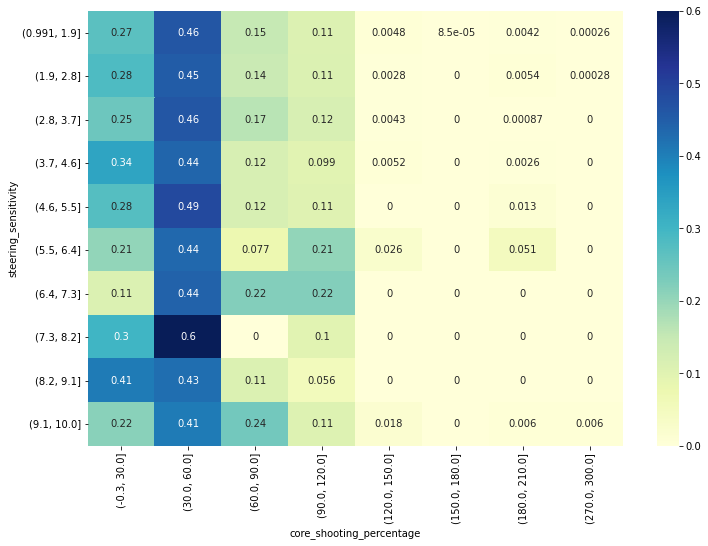

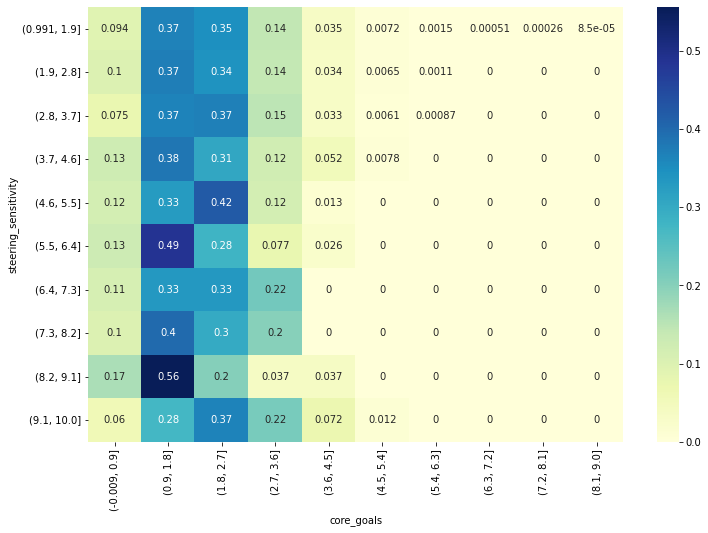

In [33]:
mvpOnly = clean_players[['advanced_mvp', 'core_shooting_percentage', 'core_goals', 'steering_sensitivity']].copy()
mvpOnly = mvpOnly[mvpOnly['advanced_mvp'] == 1]
mvpOnly.reset_index(drop=True, inplace=True)

mvpOnly['core_shooting_percentage'] = pd.cut(mvpOnly['core_shooting_percentage'], 10)
mvpOnly['core_goals'] = pd.cut(mvpOnly['core_goals'], 10)
mvpOnly['steering_sensitivity'] = pd.cut(mvpOnly['steering_sensitivity'], 10)

contigency = pd.crosstab(mvpOnly['steering_sensitivity'], mvpOnly['core_shooting_percentage'])
contigency

display(contigency)

contigency_pct = pd.crosstab(mvpOnly['steering_sensitivity'], mvpOnly['core_shooting_percentage'], normalize='index')
contigency_pct

plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

c, p, dof, expected = chi2_contingency(contigency)
print("[Player Steering Sensitivity Setting to Shooting Percentage] P-Value: ", p)

contigency = pd.crosstab(mvpOnly['steering_sensitivity'], mvpOnly['core_goals'])
contigency

display(contigency)

contigency_pct = pd.crosstab(mvpOnly['steering_sensitivity'], mvpOnly['core_goals'], normalize='index')
contigency_pct

plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

c, p, dof, expected = chi2_contingency(contigency)
print("[Player Steering Sensitivity Setting to Goals Scored] P-Value: ", p)

We can definitively conclude that there is no correlation between steering sensitivity and an individual player's shooting percentage given our computed p-value using the chi squared test.

Interestingly, there did appear to be a correlation between steering sensitivity and the pure number of goals scored for MVP players. Our computer p-value for this relation was 0.79 meaning that we can maintain the null hypothesis at a 95% confidence level but reject it at a 75% confidence level. We can conclude there is a decent probability that number of goals scored for MVP players is a response function of their steering sensitivity.

**Contributions**: We all contributed equally throughout each part of the project.